In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
df = pd.read_csv("hotel_bookings.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [19]:
df.drop(["country", "agent", "company"], axis=1, inplace=True)

In [20]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [23]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format="%Y-%m-%d")

In [25]:
df["reservation_status_year"] = df["reservation_status_date"] .dt.year
df["reservation_status_month"] = df["reservation_status_date"] .dt.month
df["reservation_status_day"] = df["reservation_status_date"] .dt.day

In [27]:
df = df.drop("reservation_status_date", axis=1)

In [ ]:
df.info()

In [29]:
cols = []
for i in df.columns:
    if df[i].dtype == "object":
        cols.append(i)

In [30]:
for col in cols:
    df[col] = label_encoder(df[col])

hotel ['City Hotel' 'Resort Hotel']
arrival_date_month ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment ['Aviation' 'Complementary' 'Corporate' 'Direct' 'Groups' 'Offline TA/TO'
 'Online TA' 'Undefined']
distribution_channel ['Corporate' 'Direct' 'GDS' 'TA/TO' 'Undefined']
reserved_room_type ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'L' 'P']
assigned_room_type ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'P']
deposit_type ['No Deposit' 'Non Refund' 'Refundable']
customer_type ['Contract' 'Group' 'Transient' 'Transient-Party']
reservation_status ['Canceled' 'Check-Out' 'No-Show']


In [46]:
X = df.drop("hotel", axis=1)
y = df["hotel"]

In [47]:
X = X.fillna(0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9623502805930145

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15927
           1       0.95      0.93      0.94      7951

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



In [54]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

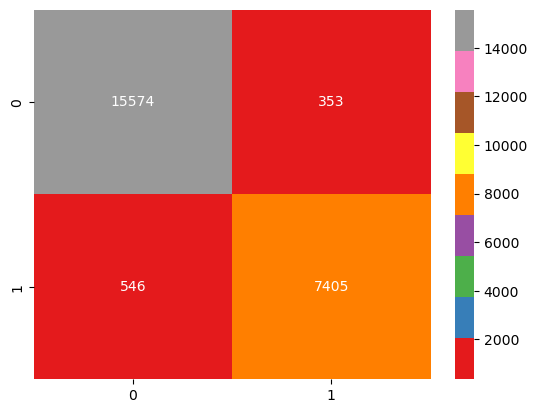

In [56]:
sns.heatmap(cm, annot=True, cmap="Set1", fmt=".0f")

In [57]:
pickle.dump(rf, open("rf.pkl", "wb"))